In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords 

In [2]:

data=pd.read_csv(r"C:\Users\dazvi\OneDrive\Desktop\cognifyz internship\Dataset .csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
#remove stop words
keywords = []
stop_words = set(stopwords.words('english'))

for review in data['Rating text'].dropna():
    words = review.split()
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    for word in words:
        keywords.append(word)

In [12]:
keywords

['excellent',
 'excellent',
 'good',
 'excellent',
 'excellent',
 'good',
 'good',
 'good',
 'excellent',
 'excellent',
 'excellent',
 'good',
 'excellent',
 'good',
 'good',
 'good',
 'good',
 'excellent',
 'excellent',
 'good',
 'excellent',
 'excellent',
 'average',
 'good',
 'good',
 'good',
 'average',
 'average',
 'good',
 'good',
 'rated',
 'good',
 'average',
 'good',
 'good',
 'good',
 'good',
 'good',
 'average',
 'excellent',
 'average',
 'good',
 'good',
 'excellent',
 'excellent',
 'excellent',
 'good',
 'excellent',
 'excellent',
 'excellent',
 'excellent',
 'excellent',
 'good',
 'good',
 'excellent',
 'good',
 'good',
 'good',
 'rated',
 'excellent',
 'excellent',
 'good',
 'excellent',
 'good',
 'average',
 'good',
 'excellent',
 'excellent',
 'good',
 'rated',
 'average',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'rated',
 'rated',
 'good',
 'excellent',
 'good',
 'average',
 'average',
 'average',
 'average',
 'average',
 'average',
 'good',
 'good',
 'g

In [32]:

word_counts = Counter(keywords)

print(word_counts)

Counter({'average': 3737, 'good': 3179, 'rated': 2148, 'excellent': 301, 'poor': 186})


In [30]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [38]:
lambda t: [w for w in word_tokenize(t.lower().translate(str.maketrans("", "", string.punctuation))) if w not in stopwords.words('english')]


<function __main__.<lambda>(t)>

In [33]:
# Create empty lists to store positive and negative words
positive = []
negative = []


In [41]:
# Analyze each review and extract positive and negative reviews from keywords
for t in data['Rating text'].astype(str):
    tokens = pre(t)
    score = sia.polarity_scores(t)['compound']
    (positive if score >= 0.05 else negative).extend(tokens)


In [43]:
# Calculate the most common positive and negative keywords
common_positive_keywords,common_negative_keywords = pd.Series(positive).value_counts(), pd.Series(negative).value_counts()



In [45]:
 common_positive_keywords

good         3189
excellent     313
Name: count, dtype: int64

In [46]:
common_negative_keywords

average    3737
rated      2148
poor        186
Name: count, dtype: int64

In [48]:
# Calculate the length of each review (number of words)
data['Review Length'] = data['Rating text'].apply(lambda x: len(x.split()))
data['Review Length']

0       1
1       1
2       2
3       1
4       1
       ..
9546    2
9547    2
9548    1
9549    2
9550    2
Name: Review Length, Length: 9551, dtype: int64

In [56]:
# Group the data by rating and calculate the average review length for each rating
average_length_by_rating = data.groupby('Aggregate rating')['Review Length'].mean()
average_length_by_rating

Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64

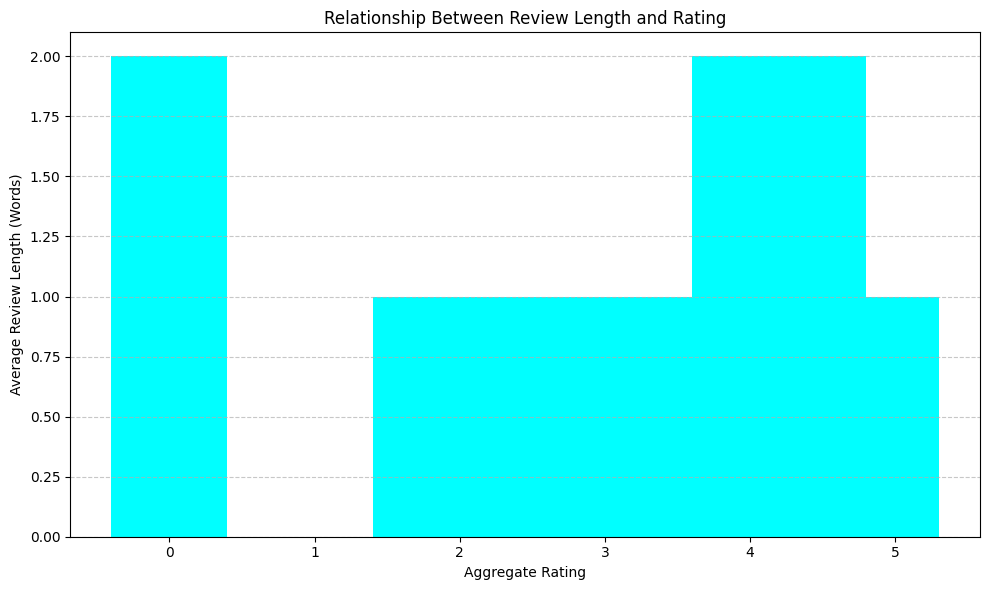

In [57]:
# Create a bar chart to visualize the relationship with rotated X-axis labels
plt.figure(figsize=(10, 6))
plt.bar(average_length_by_rating.index, average_length_by_rating.values, color='cyan')
plt.xlabel('Aggregate Rating')
plt.ylabel('Average Review Length (Words)')
plt.title('Relationship Between Review Length and Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

plt.show()